# Redes Neurais nos Exames de Bruxo de Hogwarts

### Descriçao

---
1. O objetivo deste notebook é aprender sobre Redes Neurais Artificias
2. Vamos construir um conjunto de dados baseado no universo do Harry Potter
3. O problema consiste em prever qual a nota do aluno
---

### Dicionário


Fields	                                                  | Type  	  |    Description                              |
----------------------------------------------------------|:---------:|:-------------------------------------------:|
student 	  										  	  |string     | name of participants	                    |
age														  |integer    | age of participants                         |
houses		     										  |string     | house of participants		                |
spell												  |float      | subject									    |
hours_of_studie											  |integer    | time spend in studie	     			    |
hours_of_practice										 |integer    | time spend in practice	     			    |
alchemy            										  |float     | subject                                     |


----
### Objetivos

1. O problema consiste em criar uma rede neural capaz de prever a nota que o aluno vai tirar em determinada materia.
2. Vamos construir um conjunto de dados historicos desses alunos e dividi-los em teste e treino.
3. Variaveis independentes (Horas de Estudo e Horas de Pratica)
4. Variavel alvo (Qualquer materia)
---


### Baixando os pacotes

In [3]:
!pip install pandas numpy scikit-learn keras Faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.0 MB/s eta 0:00:00


In [50]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# Construindo o Dataset Faker

In [51]:

def generate(num):
    fake = Faker() #criando o metodo de nomes falsos
    data = []
    subjects = ['spell', 'alchemy'] #lista de materias

    for _ in range(num):
        student = fake.name()
        age = random.randint(11, 39)
        house = random.choice(['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff'])
        hours_of_studie = random.randint(1,24)
        hours_of_practice = random.randint(1, 24)
        row = {
            'student': student,
            'age': age,
            'house': house,
            'hours_of_studie': hours_of_studie,
            'hours_of_practice': hours_of_practice,
        }
        for subject in subjects:
            row[subject] = round(random.uniform(0,10),2)
        data.append(row)

    df = pd.DataFrame(data)
    return df

df = generate(1000)
df


,student,age,house,hours_of_studie,hours_of_practice,spell,alchemy
0,Marie Schaefer,27,Ravenclaw,8,11,7.69,7.88
1,Rebecca Grimes,20,Gryffindor,7,15,5.36,9.65
2,Douglas Foster,13,Slytherin,24,8,6.34,4.22
3,Matthew Reed,13,Gryffindor,19,5,4.81,3.00
4,Mark Blankenship,29,Gryffindor,18,24,9.66,6.50
...,...,...,...,...,...,...,...
995,Jeremy Parrish,27,Ravenclaw,1,11,7.58,1.77
996,Laura Bailey,32,Slytherin,21,20,1.70,7.54
997,Samantha Rasmussen,20,Slytherin,8,1,2.59,9.01
998,Heidi Turner,23,Slytherin,8,13,8.25,4.88


### Criando nosso modelo de rede neural

In [52]:
# Definir as variáveis independentes e a variável alvo
X = df[['hours_of_studie', 'hours_of_practice']]
y = df['spell']  # ou 'alchemy' como variável alvo

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir o modelo da rede neural
modelo = Sequential()
modelo.add(Dense(units=64, activation='relu', input_dim=X_treino.shape[1]))
modelo.add(Dropout(0.4))
modelo.add(Dense(units=32, activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Dense(units=1, activation='sigmoid'))

# Compilar o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(X_treino, y_treino, epochs=50, batch_size=32)

# Treinar o modelo

# Avaliar o modelo
loss = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}')

# Fazer previsões
predictions = modelo.predict(X_test)

Epoch 1/50
22/22 [==============================] - 1s 2ms/step - loss: -1.2879 - accuracy: 0.0014
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: -8.0190 - accuracy: 0.0014
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: -26.2304 - accuracy: 0.0014
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: -78.0873 - accuracy: 0.0014
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: -222.0779 - accuracy: 0.0014
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: -538.3839 - accuracy: 0.0014
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: -1213.9380 - accuracy: 0.0014
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: -2328.6851 - accuracy: 0.0014
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: -4277.2847 - accuracy: 0.0014
Epoch 10/50
22/22 [==============================] - 0s 3ms/step - loss: -7158.5430 - accuracy

### Visualizando nossa rede neural

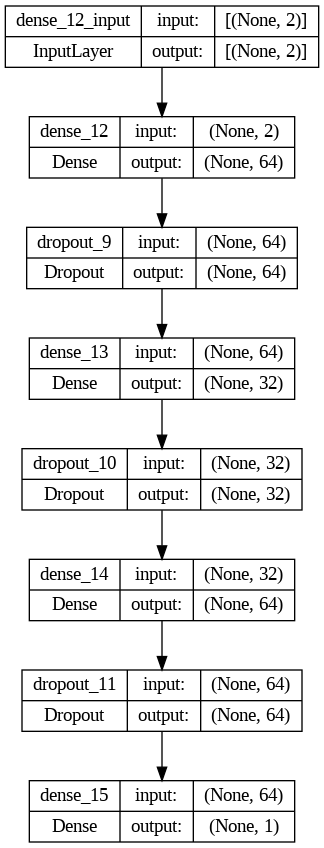

In [57]:
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True)

### Testando nosso modelo

In [53]:
df.head(4)

,student,age,house,hours_of_studie,hours_of_practice,spell,alchemy
0,Marie Schaefer,27,Ravenclaw,8,11,7.69,7.88
1,Rebecca Grimes,20,Gryffindor,7,15,5.36,9.65
2,Douglas Foster,13,Slytherin,24,8,6.34,4.22
3,Matthew Reed,13,Gryffindor,19,5,4.81,3.00


# Confirmando nossa classificação

In [54]:
# Selecionar os quatro primeiros itens do DataFrame
test_data = df[['hours_of_studie', 'hours_of_practice', 'spell']].head(4)

# Normalizar os dados de teste
X_test = scaler.transform(test_data[['hours_of_studie', 'hours_of_practice']])

# Gerar previsões para os quatro primeiros itens
predictions = modelo.predict(X_test)

# Comparar previsões com as notas reais
for i, prediction in enumerate(predictions):
    print(f'Previsão: {prediction[0]}, Nota Real: {test_data.iloc[i]["spell"]}')


1/1 [==============================] - 0s 22ms/step
Previsão: 1.0, Nota Real: 7.69
Previsão: 1.0, Nota Real: 5.36
Previsão: 1.0, Nota Real: 6.34
Previsão: 1.0, Nota Real: 4.81


# Confirmando com novos valores

In [56]:
new_df = generate(4)

X_test = scaler.transform(test_data[['hours_of_studie', 'hours_of_practice']]) # Normalizar os novos dados


# Gerar previsões
predictions = modelo.predict(X_test)

# Exibir as previsões
for i, prediction in enumerate(predictions):
    print(f'Previsão: {prediction[0]}, Nota Real: {test_data.iloc[i]["spell"]}')

1/1 [==============================] - 0s 43ms/step
Previsão: 1.0, Nota Real: 7.69
Previsão: 1.0, Nota Real: 5.36
Previsão: 1.0, Nota Real: 6.34
Previsão: 1.0, Nota Real: 4.81


### Avaliando o Modelo

In [65]:
X_all = scaler.transform(df[['hours_of_studie', 'hours_of_practice']])
predictions_all = modelo.predict(X_all)

y_true = df['spell']  # ou 'alchemy' como variável alvo
y_pred = predictions_all.flatten()

# Calcular o erro médio absoluto (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calcular o coeficiente de determinação (R²)
r2 = r2_score(y_true, y_pred)

print(f'Erro Médio Absoluto (MAE): {mae}') # O MAE é a média das diferenças absolutas entre as previsões do modelo e os valores reais. Em outras palavras, ele mede o quão perto as previsões estão dos valores reais, sem considerar a direção. Um MAE mais baixo indica que o modelo está fazendo previsões mais precisas.
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')

32/32 [==============================] - 0s 5ms/step
Erro Médio Absoluto (MAE): 4.13113
Erro Quadrático Médio (MSE): 24.5123023
Coeficiente de Determinação (R²): -1.9713493826691146


### Inferencia

um MAE de aproximadamente 4.13 significa que, em média, as previsões do seu modelo estão a cerca de 4.13 unidades de distância dos valores reais. Um MSE de aproximadamente 24.51 indica que, em média, o quadrado da diferença entre as previsões e os valores reais é de aproximadamente 24.51. O coeficiente de determinação negativo indica que o modelo não se ajustou bem aos dados, sugerindo que há outros fatores não considerados pelo modelo que afetam as notas dos alunos.